# Project: tdmb Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section I will apply the steps of data analysis process to investigate the features of the tdmb movies dataset that I have selected as my project 1. 
The dataset shows some movie features that might have an effect on the revenue including budget, popularity, vote count and the producing company.

> By analyzing those features we can answer the following questions:

>>1- What are the 10 highest revenue companies in the last 10 years?

>>2- How much are the max. and min. values revenue of the above companies?

>>3- What are the top 3 common genres features associated with these top 10 revenue companies above?

>>4- What are the 10 highest revenue movies in the last 10 years?

>>5- What features that seem to have an effect on the movie revenue in the last 10 years?


## Importing python packages

In [211]:
# Importing python packages: this is a necessary initial step to be able to use functionalities.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [212]:
#   Loading the data as a pandas dataframe
df_moviedata = pd.read_csv('tmdb-movies.csv')

In [213]:
# Printing the head of the dataframe displays the first 5 rows of the data.
df_moviedata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [214]:
df_moviedata.shape

(10866, 21)

> The shape attribute tells us about the dimensions of data. In our case there are 10866 rows and 21 columns in the dataset.

In [215]:
# Inspecting the data types of the variables
df_moviedata.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> The data types of numerical data range from integer to float values. The object data type represent all the string data over the whole dataset. 

In [216]:
df_moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> As we see above, some columns contain null values which may affect the analysis process; so we should start the cleaning step of data wrangling.
### Data Cleaning (Removing the unnecessary columns and treating the null values)

>Removing unnecessary columns.

In [217]:
#  Removing the unnecessary columns that have no value in the analysis.
df_moviedata.drop(['id', 'imdb_id', 'homepage', 'keywords', 'tagline', 'overview', 'runtime', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [218]:
# Number of columns containing NaN values
display(df_moviedata.isna().any())
print('===============================')
print('{} Columns containing NaN values'.format(df_moviedata.isna().any().sum()))
print('===============================')


popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
director                 True
genres                   True
production_companies     True
vote_count              False
vote_average            False
release_year            False
dtype: bool

4 Columns containing NaN values


> After removing the unnecessary columns, there are only 4 columns containing null values.

>The next step is to remove null values.

In [219]:
# Removing the null values is achieved by dropna() method.
df_moviedata = df_moviedata.dropna()

> After that we must check for duplicates to remove if any.

In [220]:
#  Check for count of duplicates
df_moviedata.duplicated().sum()

1

In [221]:
df_moviedata.drop_duplicates(inplace=True)

In [222]:
#  Printing the 1st 3 rows.
df_clean = df_moviedata
df_clean.head(3)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


In [223]:
# Inspect the dimensions of data by shape attribute.
df_clean.shape

(9772, 11)

> The shape of the clean null-free dataset is 9773 rows and 11 columns.

>Then calling info() method to confirm everything is clean.

In [224]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   genres                9772 non-null   object 
 7   production_companies  9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 916.1+ KB


> As we see, the info() method summarizes the data and proves that there are no null values in the dataset. Now we can proceed to the exploratory data analysis step.

<a id='eda'></a>
# Exploratory Data Analysis

## Exploring variables

### 1- budget

array([[<AxesSubplot:title={'center':'budget'}>]], dtype=object)

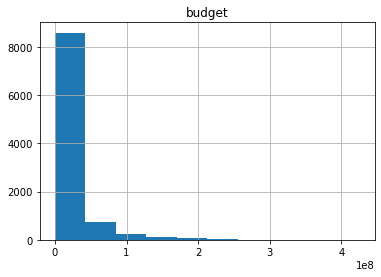

In [225]:
df_clean[['budget']].hist()

###### The budget histogram shows a skewed distribution due to outliers.

### 2- vote_average

array([[<AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

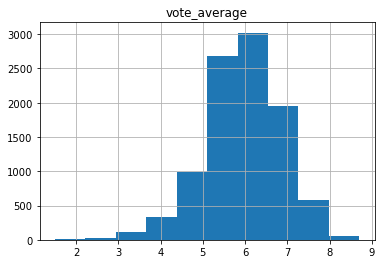

In [226]:
df_clean[['vote_average']].hist()

###### The vote_average histogram shows a normal distribution.

### 3- popularity

array([[<AxesSubplot:title={'center':'popularity'}>]], dtype=object)

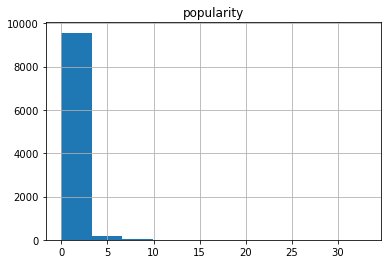

In [227]:
df_clean[['popularity']].hist()

###### The popularity histogram shows a skewed distribution due to outliers.

### 4- revenue

array([[<AxesSubplot:title={'center':'revenue'}>]], dtype=object)

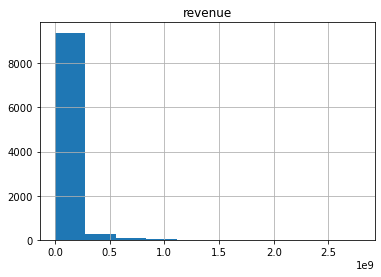

In [228]:
df_clean[['revenue']].hist()

###### The revenue histogram shows a skewed distribution due to outliers.

### 5- vote_count

array([[<AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

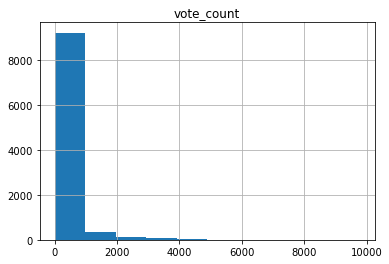

In [229]:
df_clean[['vote_count']].hist()

###### The vote_count histogram shows a skewed distribution due to outliers.

# Going through questions

## 1- What are the 10 highest revenue companies in the last 10 years?

> First we have to get the data of the last 10 years as in the above code

In [230]:
# Getting the last 10 years data
df_last_10years = df_clean.set_index('release_year').sort_index(ascending=False).query('release_year > 2005 and release_year <= 2015')

In [231]:
# Displaying the 1st 5 rows.
df_last_10years.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average
release_year,,,,,,,,,,
2015,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5
2015,0.265010,0,0,Lady Chatterley's Lover,Richard Madden|Holliday Grainger|James Norton|...,Jed Mercurio,Romance|Drama,Hartswood Films|Serena Cullen Productions,15,6.3
2015,0.198522,0,0,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,Mark Neale,Documentary,First Movie Companie,14,8.0
2015,0.299427,0,4444,Club Life,Jerry Ferrara|Jessica Szohr|Robert Davi|Jay R....,Fabrizio Conte,Drama,Radar Pictures|2B Films,12,6.3
2015,0.298861,0,0,Cleveland Abduction,Taryn Manning|Raymond Cruz|Katie Sarife|Samant...,Alex Kalymnios,Drama|Crime,Lifetime Network|Sony Pictures Television|Wood...,33,6.3


>Then we have to sort the dataset by revenue in a descending order.

In [232]:
# Sorting the data.
df_last_10years_sorted = df_last_10years.sort_values(by=['revenue'], ascending=False)

>Constructing a dataframe containing the top 10 rows.

In [233]:
# Making a dataframe for the top 10 rows.
df_top10_rev_coms = df_last_10years_sorted.iloc[:10, :]

>In the end we can get the top 10 revenues companies directly from the sorted dataframe.

In [234]:
# Get the top 10 revenue companies in the last 10 years.
top10_rev_coms = df_top10_rev_coms.production_companies.values.tolist()

>Display the resulted top 10revenue companies in the last 10 years.

In [235]:
# Displaying the resultant top 10 revenue companies in the last 10 years.
top10_rev_coms

['Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment',
 'Lucasfilm|Truenorth Productions|Bad Robot',
 'Marvel Studios',
 'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
 'Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films',
 'Marvel Studios|Prime Focus|Revolution Sun Studios',
 'Warner Bros.|Heyday Films|Moving Picture Company (MPC)',
 'Walt Disney Pictures|Walt Disney Animation Studios',
 'Marvel Studios',
 'Universal Pictures|Illumination Entertainment']

>Exploring the top 10 revenue companies with revenue in bars.

<AxesSubplot:title={'center':'Top 10 Producing companies revenues'}, xlabel='Producing companies', ylabel='Revenue'>

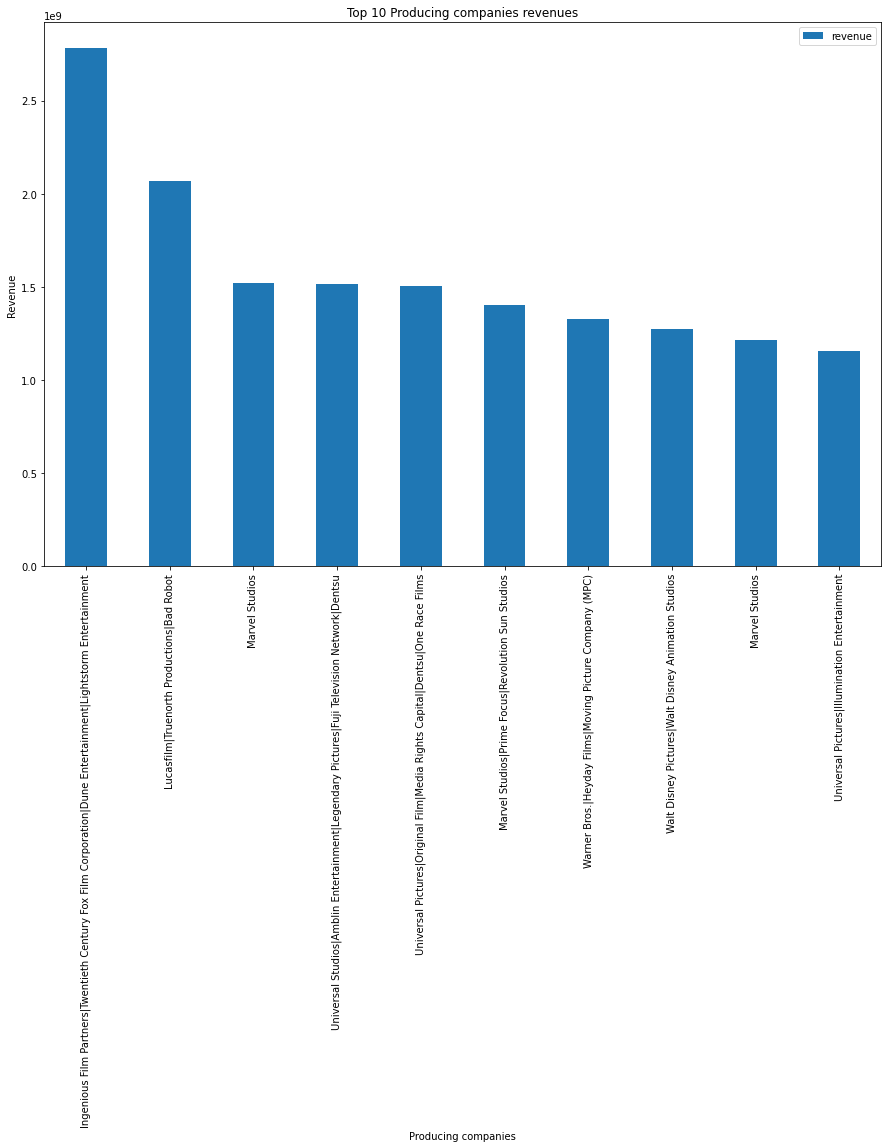

In [236]:
# Plotting the result.
df_top10_rev_coms.plot(x='production_companies', y='revenue', xlabel='Producing companies', ylabel='Revenue', kind='bar', title='Top 10 Producing companies revenues', figsize=(15, 10))

##### In order to get the top 10 revenue producing companies in the last 10 years, I first filtered the data to get a dataframe containing the last 10 years movies -> after that I sorted the data by revenue column in a descending order -> after that I constructed a dataframe for the 1st 10 rows by dataframe slicing -> Finally got a list of the top 10revenue companies in the last 10 years.

## 2- How much are the max. and min. values revenue of the above companies?

> Using the dataframe of the top 10 revenues we can get the min. and max. values directly.

>I will construct it in the form of a dataframe by slicing and using append() method and resetting an index as I will show below.

In [237]:
# Extracting the result in the form of a combined dataframe
max_min_rev_coms = df_top10_rev_coms.iloc[:1, :].append(df_top10_rev_coms.iloc[-1, :])[['revenue', 'production_companies']]
max_min_rev_coms = max_min_rev_coms.reset_index()
max_min_rev_coms.index = ['Max', 'Min']

In [238]:
#  Display the min. max. result.
max_min_rev_coms

,release_year,revenue,production_companies
Max,2009,2781505847,Ingenious Film Partners|Twentieth Century Fox ...
Min,2015,1156730962,Universal Pictures|Illumination Entertainment


##### To get the min and max values I sliced the data to get individual dataframes for min and max revenues -> then appending the 2 individual dataframes -> then resetting index of the final dataframe to min and max

## 3- What are the top 3 common genres features associated with these top 10 revenue companies above?

> 1st we extract the genre features from the complex genre name and get their counts.

In [239]:
# Extracting the genre features.

# Using a function
def extract_features(list):
    x = []
    for item in list:
        if '|' in item:
            split = item.split('|')
            for i in split:
                x.append(i)
    return x

In [240]:
# Apply the function on the genres list from the dataframe
# Call the function to get the separate genre features.
genre_features = extract_features(df_top10_rev_coms.genres.tolist())
genre_features

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Adventure',
 'Family',
 'Fantasy',
 'Animation',
 'Adventure',
 'Family',
 'Action',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy']

In [241]:
#  Getting counts of separated genre features
genre_features = pd.Series(genre_features)
genre_counts = genre_features.value_counts()
genre_counts

Adventure          9
Action             7
Science Fiction    6
Family             3
Fantasy            3
Animation          2
Thriller           2
Comedy             1
Crime              1
dtype: int64

> 2nd we can get the proportions of each feature in the dataset.

In [242]:
# proportions
# genre_prop = genre_counts/len(df_top10_rev_coms) 
# or
# using numpy :
genre_prop = np.divide(genre_counts, len(df_top10_rev_coms))

In [243]:
genre_prop

Adventure          0.9
Action             0.7
Science Fiction    0.6
Family             0.3
Fantasy            0.3
Animation          0.2
Thriller           0.2
Comedy             0.1
Crime              0.1
dtype: float64

>As we see the top 3 genre features are adventure, action and science fiction.

>We can display it as a dataframe.

In [244]:
# Top 3 genre features
top3_genres = genre_prop.sort_values(ascending=False)[:3]
top3_genres  = pd.DataFrame(top3_genres)
top3_genres.columns = ['Proportions']

In [245]:
top3_genres

,Proportions
Adventure,0.9
Action,0.7
Science Fiction,0.6


>Visualizing the top 3 genre features.

<AxesSubplot:title={'center':'Genre Proportions diagram'}, xlabel='Genre', ylabel='Proportions'>

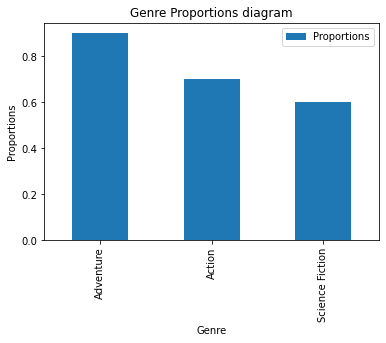

In [246]:
top3_genres.plot(kind='bar', xlabel='Genre', ylabel='Proportions', title='Genre Proportions diagram')

##### To get the top 3 most common genre features -> I defined a function called extract_features(list) which act on a list that in our case is represented by genres column list -> since genres column has a combined data containing | character; I have to split it to its individual components -> The result is a list containing all the possible individual genre features -> The rest of work was to count each genre feature and selecting the top 3 ones to get the final result.

## 4- What are the 10 highest revenue movies in the last 10 years?

>We can get it from the top 10 revenue companies dataset.

In [247]:
# Dealing with the top 10 revenue companies dataset.
top10_rev_movies = df_top10_rev_coms.original_title.values.tolist()

In [248]:
# Displaying the top 10 revenue movies in the last 10 years.
top10_rev_movies

['Avatar',
 'Star Wars: The Force Awakens',
 'The Avengers',
 'Jurassic World',
 'Furious 7',
 'Avengers: Age of Ultron',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Frozen',
 'Iron Man 3',
 'Minions']

##### This question was pretty simple that was answered directly by getting the list of original_title values from the top 10 revenue companies dataset.

## 5- What features that seem to have an effect on the movie revenue in the last 10 years?

>We can simply using simple visuals.

>Going through plotting each possible feature that can affect the revenue.

<AxesSubplot:title={'center':'Budget Popularity Relationship'}, xlabel='budget', ylabel='popularity'>

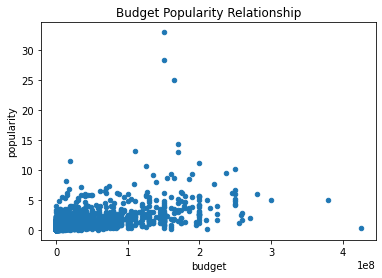

In [249]:
# Applying visuals.
df_last_10years.plot(x='budget', y='popularity', kind='scatter', title='Budget Popularity Relationship')

##### A linear positive relationship between budget and popularity exists although the presence of outliers.

<AxesSubplot:title={'center':'Budget and vote count relationship'}, xlabel='budget', ylabel='vote_count'>

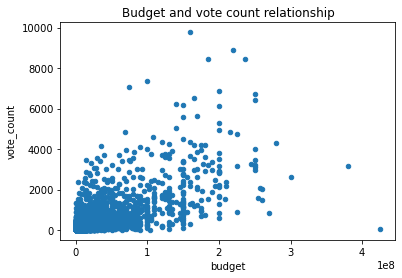

In [250]:
df_last_10years.plot(x='budget', y='vote_count', kind='scatter', title='Budget and vote count relationship')

##### A linear positive relationship between budget and vote_count exists although the presence of outliers.

<AxesSubplot:title={'center':'Popularity Revenue relationship'}, xlabel='popularity', ylabel='revenue'>

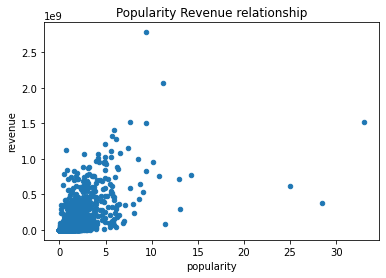

In [251]:
df_last_10years.plot(x='popularity', y='revenue', kind='scatter', title='Popularity Revenue relationship')

##### A linear positive relationship between popularity and revenue exists although the presence of outliers.

<AxesSubplot:title={'center':'Popularity and vote count relationship'}, xlabel='popularity', ylabel='vote_count'>

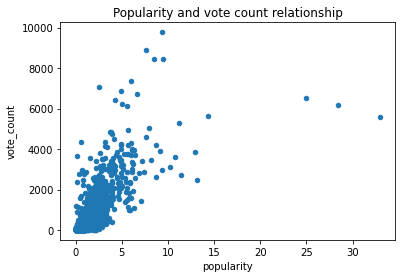

In [252]:
df_last_10years.plot(x='popularity', y='vote_count', kind='scatter', title='Popularity and vote count relationship')

##### A linear positive relationship between popularity and vote_count exists although the presence of outliers.

<AxesSubplot:title={'center':'Vote count and revenue relationship'}, xlabel='vote_count', ylabel='revenue'>

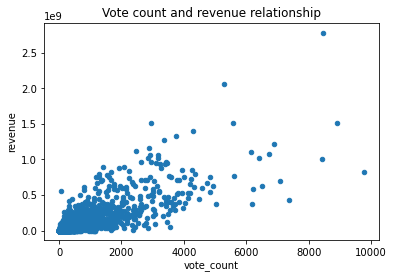

In [253]:
df_last_10years.plot(x='vote_count', y='revenue', kind='scatter', title='Vote count and revenue relationship')

##### A linear positive relationship between vote_count and revenue exists although the presence of outliers.

<AxesSubplot:title={'center':'Budget Revenue Relationship visualization'}, xlabel='budget', ylabel='revenue'>

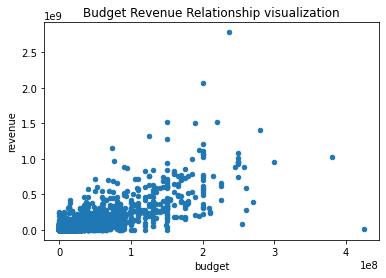

In [254]:
df_last_10years.plot(x='budget', y='revenue', kind='scatter', title='Budget Revenue Relationship visualization')

#####  We notice that the budget has a positive linear relationship with both popularity and vote count.
##### Popularity and vote count have a positive linear relationship with each other.
##### Budget, popularity, vote count have a positive linear relationship with revenue.
#### >> Although the presence of outliers, we can say that [ budget, popularity and vote count ] can affect the [ revenue ] of the movie.

<a id='conclusions'></a>
## Conclusions
##### In this analysis I have filtered the data to get the data of the last 10 years that are important to us from the dataset. The top 10 revenue companies in this period are extracted.
##### Also I extracted the most common genre inline features that compose the complex genre description.
##### The top 10 revenue movies in the last 10 years are also extracted.
##### By visualizing the features versus revenue I noticed that there is a positive linear relationship between [budget, popularity, vote count] and [revenue].
##### The only limitation is that there are outliers noticed in the visuals between [buget, popularity, vote count] and [revenue] although not a negation of the presence  of a positive relationship.
